In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from tabulate import tabulate
sns.set_style("whitegrid")
mpl.rcParams['lines.markersize'] = 12

In [2]:
def load_patient(df, rid, last_tp):
    rids = df.RID.unique()
    patient = df.loc[df.RID == rid,:].copy()
    patient.loc[:,"M"] -= last_tp
    return patient

In [3]:
def plot_patient_feature(patient, feature, fig, ax, tp=0, column_type=float):
    patient = patient.replace(r'^\s+$', np.nan, regex=True)
    patient = patient.dropna(subset=[feature])
    patient[feature] = patient[feature].astype(column_type)
    
    sns.lineplot(y=feature, x="M", alpha=.8, palette="muted",
        data=patient[patient.M <= tp], ax=ax, label=feature, marker='o',markersize=16, linewidth=4)
    sns.lineplot(y=feature, x="M", alpha=.8, palette="muted",
        data=patient[patient.M >= tp], ax=ax, label=feature, marker='o', linestyle="--",markersize=16, linewidth=4)

    try:
        ax.get_legend().remove()
    except:
        return 0
    lgd = ax.legend(labels=[feature],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
    ax.set_xlabel('')
    return lgd   


In [4]:
def plot_sub_feature(patient, feature, fig, ax, column_type=float, tp=0):
    patient = patient.replace(r'^\s+$', np.nan, regex=True)
    patient = patient.dropna(subset=[feature])
    patient.loc[:,feature] = patient.loc[:,feature].astype(column_type)
    
    sns.lineplot(y=feature, x="M", alpha=.2, color="grey",
        data=patient[patient.M <=tp], ax=ax, label=feature, marker='o')
    sns.lineplot(y=feature, x="M", alpha=.2, color="grey",
        data=patient[patient.M >=tp], ax=ax, label=feature, marker='o', linestyle="--")
    try:
        ax.get_legend().remove()
    except:
        return 0
    return 0
        
        


In [5]:
def plot_cluster_feature(cluster, df, feature, fig, ax):
    range_m = 3
    nb_measures = np.zeros(range_m)
    measure = np.zeros(range_m)
    for i in range(len(cluster)):
        rid = cluster.RID[i]
        tp = cluster.TP[i]
        patient = load_patient(df, rid, tp)
        patient = patient.replace(r'^\s+$', np.nan, regex=True)
        patient.loc[:,feature] = patient.loc[:,feature].astype(float)
        for i in range(range_m):
            time = 12*(i-1)
            try:
                m = patient[patient.M == time].loc[:, feature].iloc[0]
                if not m == np.nan and m > 0:
                    measure[i] += m
                    nb_measures[i] += 1
            except:
                continue

        plot_sub_feature(patient, feature, fig, ax)
    mean = measure/nb_measures
    return mean

In [6]:
mapping = {
    1: 0,
    7: 0,
    9: 0,
    2: 1,
    4: 1,
    8: 1,
    3: 2,
    5: 2,
    6: 2
}

In [7]:
file = "data/TADPOLE_D1_D2.csv"

df = pd.read_csv(file)
df.replace({"DXCHANGE":mapping}, inplace=True)
df["HippocampusRelative"] = df.Hippocampus / df.WholeBrain

/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,71

In [8]:
prototype_ids=[[835, 24],[376, 48], [1247, 12]]
prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

# Set clusters to plot
cluster_n=[0,1,2]
# Set features to plot
features = ["DXCHANGE", "ADAS13", "MMSE", "WholeBrain", "Hippocampus","ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]

In [9]:
prototype_ids=[[4746, 36],[752, 12], [406, 36]]
prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

n_clusters = 3
# Set clusters to plot
cluster_n=[0,1,2]
# Set features to plot
features = ["DXCHANGE", "ADAS13", "MMSE", "WholeBrain", "Hippocampus","ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]

In [122]:
prototype_ids=[[1247, 12], [1243, 24], [4746, 36], [1138, 24]]
prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

n_clusters = 4
# Set clusters to plot
cluster_n=[0,1,2,3]
# Set features to plot
features = ["DXCHANGE", "ADAS13","RAVLT_learning", "WholeBrain", "ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]
#features = ["DXCHANGE","RAVLT_learning"]

In [161]:
#These are the prototypes from training only on transitioner data

prototype_ids=[[1057, 24], [4746, 36], [982, 12], [631, 6]]
prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

n_clusters = 4
# Set clusters to plot
cluster_n=[0,1,2,3]
# Set features to plot
features = ["DXCHANGE","ADAS13", "WholeBrain","ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]

In [18]:
#These are the prototypes trained during model training

prototype_ids=[[1081.0, 6.0], [770, 12], [241, 36]]
prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

n_clusters = 3
# Set clusters to plot
cluster_n=[0,1,2]
# Set features to plot
features = ["DXCHANGE","ADAS13", "MMSE", "WholeBrain","HippocampusRelative", "ICV", "ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]

In [8]:
# Prototypes from transitioners in classifier latent space

prototype_ids=[[195, 12], [4502, 12], [344, 12], [179, 18]]

prototypes = pd.DataFrame(prototype_ids, columns=["RID", "TP"])

n_clusters = 4
# Set clusters to plot
cluster_n=[2, 3]
# Set features to plot
features = ["DXCHANGE","ADAS13","RAVLT_learning", "WholeBrain","ABETA_UPENNBIOMK9_04_19_17", "TAU_UPENNBIOMK9_04_19_17"]
#features = ["DXCHANGE","ADAS13"]

In [88]:
n_cols = len(cluster_n)
n_rows = len(features)

#age, gender

gender = np.zeros(n_cols)
age_mean = np.zeros(n_cols)
age_std = np.zeros(n_cols)
for i in np.arange(n_cols):
    c = cluster_n[i]
    p = prototypes.iloc[c]
    rid = p.RID
    tp = p.TP
    
    patient = load_patient(df,rid,tp)
    patient = patient.dropna(subset=["DX"])
   
    
    cluster_file = "results/mci_ad_transitioners_{}_cluster_all_{}_{}_{}.csv".format(n_clusters,c,rid, tp)
    cluster = pd.read_csv(cluster_file)
    cluster["AGE"] = np.zeros(len(cluster))
    cluster["PTGENDER"] = len(cluster)*[None]
    for j in range(len(cluster)):
        rid = cluster.RID[j]
        tp = int(cluster.TP[j])
        patient = load_patient(df, rid, tp)
        print(patient.AGE.iloc[0])
        cluster.AGE[j] = patient[(patient["M"]==tp)].AGE
        print(cluster.AGE[j])
        cluster.PTGENDER[j] = patient.PTGENDER.iloc[0]
    age_mean[i] = cluster.AGE.mean()
    age_std[i] =cluster.AGE.std()
    gender[i] = cluster.PTGENDER[cluster.PTGENDER=="Female"].count() /cluster.PTGENDER.count()
g = pd.DataFrame({"% Females":gender, "Age mean":age_mean, "Age std":age_std})
print(tabulate(g, headers="keys", tablefmt="latex_raw"))


72.8
72.8
82.3
82.3
82.3


/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

RID    195
TP      12
Name: 0, dtype: int64
DXCHANGE
ADAS13
RAVLT_learning
WholeBrain
ABETA_UPENNBIOMK9_04_19_17
TAU_UPENNBIOMK9_04_19_17
RID    4502
TP       12
Name: 1, dtype: int64
DXCHANGE
ADAS13
RAVLT_learning
WholeBrain
ABETA_UPENNBIOMK9_04_19_17
TAU_UPENNBIOMK9_04_19_17


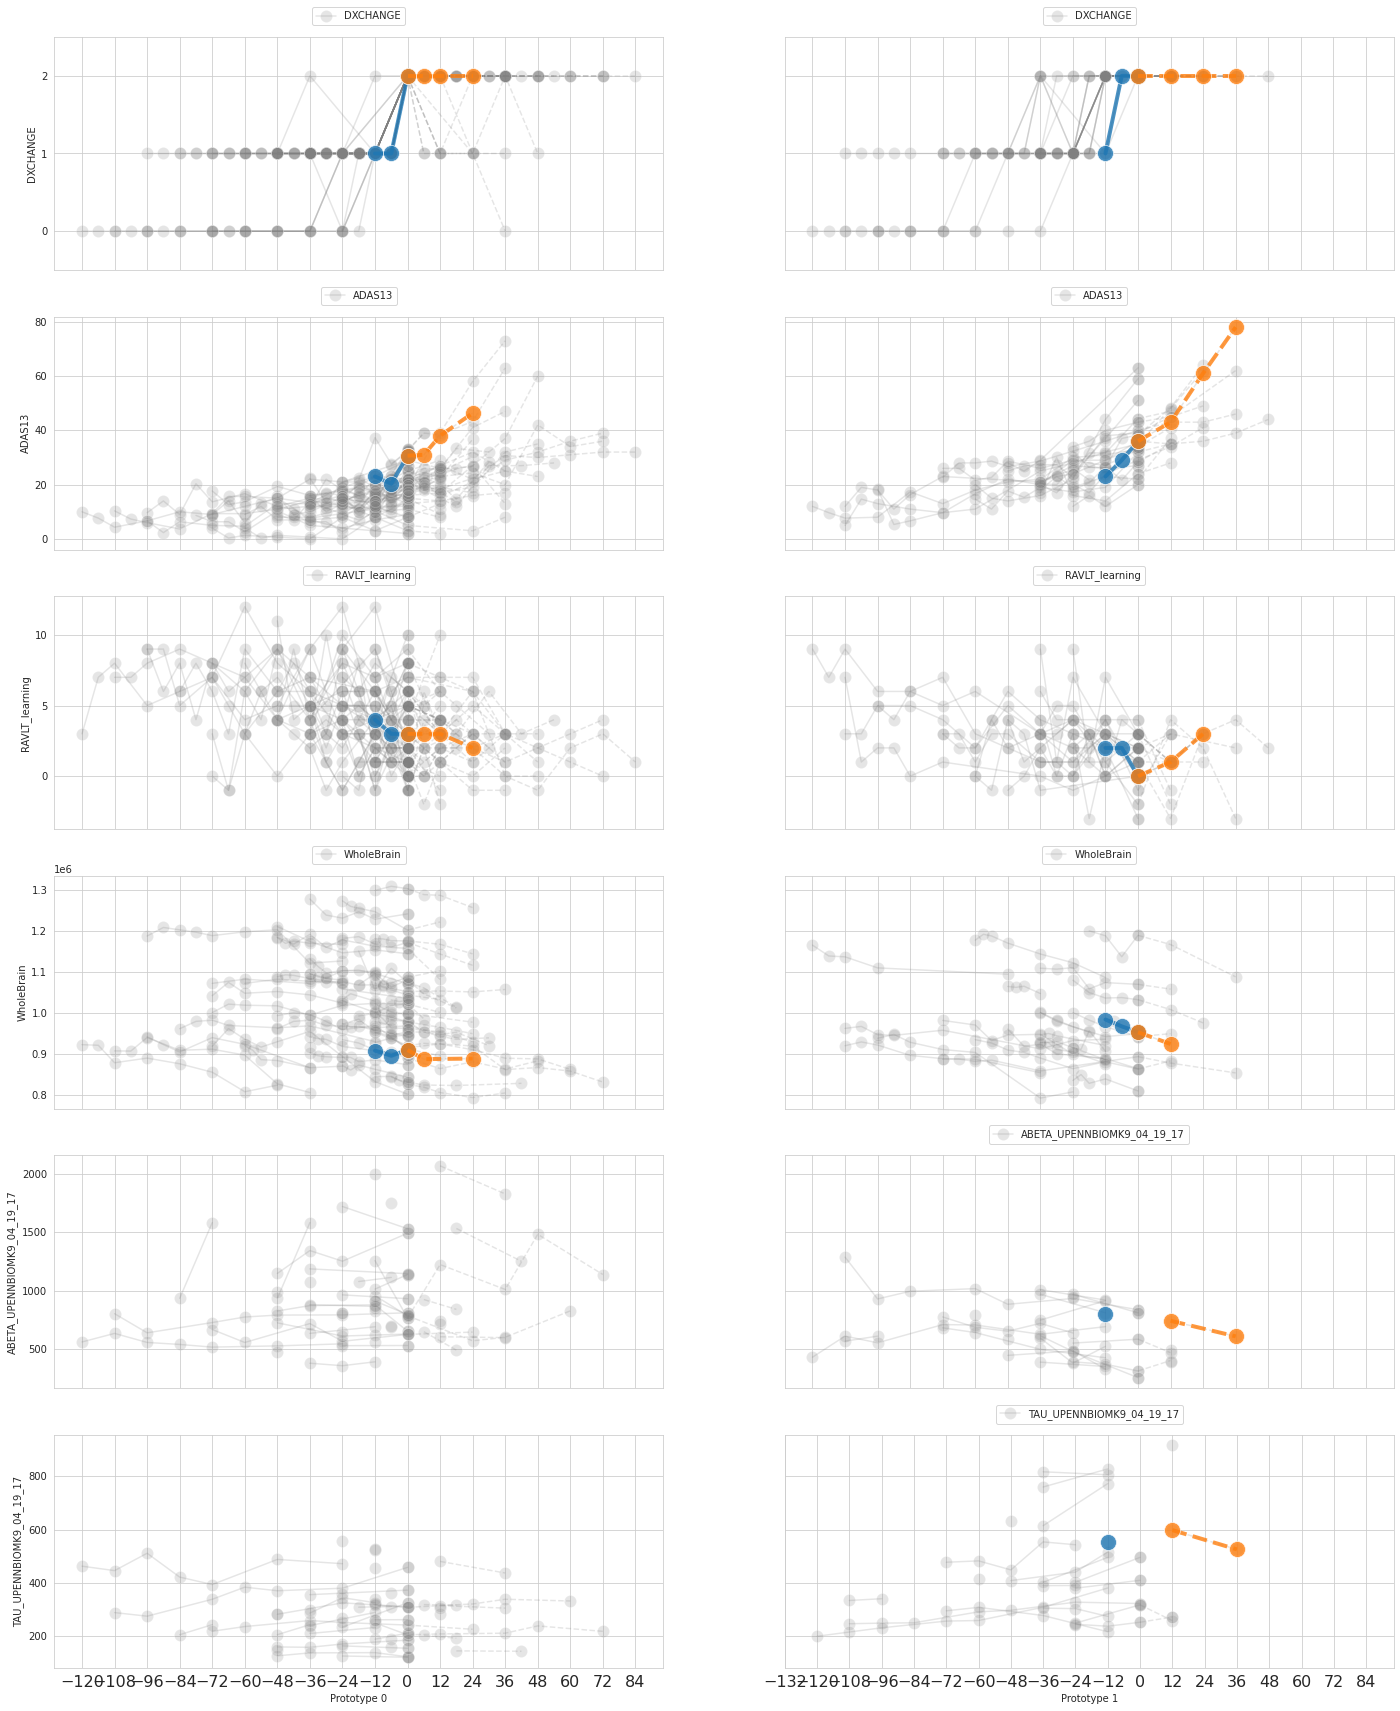

In [9]:
n_cols = len(cluster_n)
n_rows = len(features)
fig, ax = plt.subplots(n_rows,n_cols, figsize=(12*n_cols, 5*n_rows), sharex='all', sharey="row")

stats = np.zeros((n_cols, n_rows, 3))

for i in np.arange(n_cols):
    c = cluster_n[i]
    p = prototypes.iloc[c]
    print(p)
    rid = p.RID
    tp = p.TP
    
    patient = load_patient(df,rid,tp)
    patient = patient.dropna(subset=["DX"])
   
    
    cluster_file = "results/mci_ad_transitioners_{}_cluster_all_{}_{}_{}.csv".format(n_clusters,c,rid, tp)
    cluster = pd.read_csv(cluster_file)
    
    #Set y ticks for diagnosis
    ax_dx=ax[0,i]
    plt.setp(ax_dx, yticks=[0,1,2])    
    ax_dx.set_ylim([-0.5, 2.5])
    
    for j, feature in enumerate(features):
        print(feature)
        ax_curr = ax[j, i]
        mean = plot_cluster_feature(cluster, df, feature,fig, ax_curr)
        stats[i,j] = mean
        plot_patient_feature(patient, feature,fig, ax_curr)
        ax_curr.autoscale()

    plt.setp(ax[j, i], xlabel='Prototype {}'.format(c))
    
    
    #Set x ticks
    ax_last = ax[n_rows-1, i]
    ticks = ax_last.get_xlim()
    start, end = (int(ticks[0]), int(ticks[-1]))
    start = start - (start % 12)
    end = 12 -(end % 12) + end
    
    plt.setp(ax_last, xticks=np.arange(start, end, 12.0))
    plt.setp(ax_last.get_xticklabels(), fontsize=16)
plt.rcParams.update({'axes.labelsize': 'xx-large', "xtick.labelsize":'xx-large', "ytick.labelsize":'xx-large'})
    
# plt.setp(ax[2,0], yticks=np.arange(0.7, 1.3, 0.1)*1e6)
# plt.setp(ax[2,1], yticks=np.arange(0.7, 1.3, 0.1)*1e6)
# ax[2,0].set_ylim([0.6*1e6, 1.3*1e6])
# ax[2,1].set_ylim([0.6*1e6, 1.3*1e6])
plt.savefig("figures/prototypes/cluster_progression_classifier_clusters_{}_transition_1234_all.pdf".format(n_clusters),bbox_inches="tight", dpi=150)


In [28]:
stats_ae_t_ravlt_learning =  np.transpose(stats, (1,0,2)).copy()
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_ae_t_ravlt_learning[i], columns = [-12, 0, 12])
    classifier_cluster_stats[-12] = classifier_cluster_stats[0] - classifier_cluster_stats[-12]
    classifier_cluster_stats[12] = classifier_cluster_stats[12] - classifier_cluster_stats[0]
    print(feature)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_raw"))
np.transpose(stats, (1,0,2))

DXCHANGE
\begin{tabular}{rrrr}
\hline
    &      -12 &   0 &        12 \\
\hline
  0 & 0.9625   &   2 &  0        \\
  1 & 0.96     &   2 &  0        \\
  2 & 0.980769 &   2 & -0.179487 \\
  3 & 0.619048 &   2 &  0        \\
\hline
\end{tabular}
RAVLT_learning
\begin{tabular}{rrrr}
\hline
    &       -12 &       0 &         12 \\
\hline
  0 & -1.24116  & 2.27273 &  0.0701299 \\
  1 & -0.270149 & 2.02985 & -0.273094  \\
  2 & -0.414511 & 3.68966 & -0.0785441 \\
  3 & -0.219608 & 2.13333 &  0.116667  \\
\hline
\end{tabular}


array([[[1.0375    , 2.        , 2.        ],
        [1.04      , 2.        , 2.        ],
        [1.01923077, 2.        , 1.82051282],
        [1.38095238, 2.        , 2.        ]],

       [[3.51388889, 2.27272727, 2.34285714],
        [2.3       , 2.02985075, 1.75675676],
        [4.10416667, 3.68965517, 3.61111111],
        [2.35294118, 2.13333333, 2.25      ]]])

In [25]:
stats_class_t_ravlt_learning 
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_class_t_ravlt_learning[i], columns = [-12, 0, 12])
    classifier_cluster_stats[-12] = classifier_cluster_stats[0] - classifier_cluster_stats[-12]
    classifier_cluster_stats[12] = classifier_cluster_stats[12] - classifier_cluster_stats[0]
    print(feature)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_raw"))
np.transpose(stats, (1,0,2))

DXCHANGE
\begin{tabular}{rrrr}
\hline
    &      -12 &   0 &        12 \\
\hline
  0 & 0.979167 &   2 & -0.121212 \\
  1 & 0.15     &   2 &  0        \\
  2 & 1        &   2 & -0.114754 \\
  3 & 1        &   2 &  0        \\
\hline
\end{tabular}
RAVLT_learning
\begin{tabular}{rrrr}
\hline
    &       -12 &       0 &         12 \\
\hline
  0 & -0.380561 & 3.91489 & -0.214894  \\
  1 & -0.794643 & 2.14286 & -0.324675  \\
  2 & -0.772873 & 2.58427 & -0.0842697 \\
  3 & -0.406085 & 2.2963  & -0.153439  \\
\hline
\end{tabular}


array([[[1.02083333, 2.        , 1.87878788],
        [1.85      , 2.        , 2.        ],
        [1.        , 2.        , 1.8852459 ],
        [1.        , 2.        , 2.        ]],

       [[4.29545455, 3.91489362, 3.7       ],
        [2.9375    , 2.14285714, 1.81818182],
        [3.35714286, 2.58426966, 2.5       ],
        [2.70238095, 2.2962963 , 2.14285714]]])

In [21]:
stats_ae_t_fdg =  np.transpose(stats, (1,0,2))
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_ae_t_fdg[i], columns = [-12, 0, 12])
    print(feature)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_raw"))


DXCHANGE
\begin{tabular}{rrrr}
\hline
    &     -12 &   0 &   12 \\
\hline
  0 & 2.9625  &   2 &   -4 \\
  1 & 2.96    &   2 &   -4 \\
  2 & 2.98077 &   2 &   -4 \\
  3 & 2.61905 &   2 &   -4 \\
\hline
\end{tabular}
RAVLT_learning
\begin{tabular}{rrrr}
\hline
    &     -12 &       0 &       12 \\
\hline
  0 & 1.03157 & 2.27273 & -4.54545 \\
  1 & 1.7597  & 2.02985 & -4.0597  \\
  2 & 3.27514 & 3.68966 & -7.37931 \\
  3 & 1.91373 & 2.13333 & -4.26667 \\
\hline
\end{tabular}


In [18]:
stats_class_t_fdg
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_class_t_fdg[i], columns = [-12, 0, 12])
    print(feature)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_raw"))


DXCHANGE
\begin{tabular}{rrrr}
\hline
    &     -12 &   0 &      12 \\
\hline
  0 & 1.02083 &   2 & 1.87879 \\
  1 & 1.85    &   2 & 2       \\
  2 & 1       &   2 & 1.88525 \\
  3 & 1       &   2 & 2       \\
\hline
\end{tabular}
FDG
\begin{tabular}{rrrr}
\hline
    &     -12 &        0 &       12 \\
\hline
  0 & 1.20308 & 1.14594  & 1.1366   \\
  1 & 1.03048 & 0.989533 & 0.918281 \\
  2 & 1.14881 & 1.16933  & 1.07464  \\
  3 & 1.09686 & 1.03329  & 0.976192 \\
\hline
\end{tabular}


In [163]:
stats_ae_t =  np.transpose(stats, (1,0,2))
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_ae_t[i], columns = [-12, 0, 12])
    print(feature)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_raw"))


DXCHANGE
\begin{tabular}{rrrr}
\hline
    &     -12 &   0 &      12 \\
\hline
  0 & 1.0566  &   2 & 2       \\
  1 & 1.02326 &   2 & 1.75758 \\
  2 & 1.04082 &   2 & 2       \\
  3 & 1.2619  &   2 & 2       \\
\hline
\end{tabular}
ADAS13
\begin{tabular}{rrrr}
\hline
    &     -12 &       0 &      12 \\
\hline
  0 & 20.566  & 24.7883 & 27.1392 \\
  1 & 16.2326 & 19.3335 & 21.9378 \\
  2 & 24.3608 & 28.247  & 33.1723 \\
  3 & 27.6017 & 34.9592 & 40.4308 \\
\hline
\end{tabular}
WholeBrain
\begin{tabular}{rrrr}
\hline
    &              -12 &                0 &               12 \\
\hline
  0 & 941608           & 938795           & 933629           \\
  1 &      1.08962e+06 &      1.09181e+06 &      1.09274e+06 \\
  2 &      1.03961e+06 &      1.034e+06   &      1.0089e+06  \\
  3 & 897109           & 867792           & 871125           \\
\hline
\end{tabular}
ABETA_UPENNBIOMK9_04_19_17
\begin{tabular}{rrrr}
\hline
    &     -12 &       0 &       12 \\
\hline
  0 & 787.908 & 941.933 &  834.

In [158]:

stats_t
for i, feature in enumerate(features):
    classifier_cluster_stats = pd.DataFrame(stats_t[i], columns = [-12, 0, 12])
    print(feature)
    print(classifier_cluster_stats)
    print(tabulate(classifier_cluster_stats, headers="keys", tablefmt="latex_longtable"))


DXCHANGE
\begin{tabular}{rrrr}
\hline
    &     -12 &   0 &      12 \\
\hline
  0 & 1.02083 &   2 & 1.87879 \\
  1 & 1.85    &   2 & 2       \\
  2 & 1       &   2 & 1.88525 \\
  3 & 1       &   2 & 2       \\
\hline
\end{tabular}
ADAS13
\begin{tabular}{rrrr}
\hline
    &     -12 &       0 &      12 \\
\hline
  0 & 14.771  & 19.5802 & 21.3033 \\
  1 & 28.4335 & 36.5233 & 40.3093 \\
  2 & 20.205  & 24.3127 & 28.3061 \\
  3 & 25.5355 & 31.6669 & 36.9125 \\
\hline
\end{tabular}
WholeBrain
\begin{tabular}{rrrr}
\hline
    &              -12 &                0 &               12 \\
\hline
  0 &      1.02796e+06 &      1.00731e+06 &      1.01766e+06 \\
  1 & 956480           & 956920           & 981330           \\
  2 &      1.02374e+06 &      1.00997e+06 & 984959           \\
  3 & 961975           & 935642           & 923145           \\
\hline
\end{tabular}
ABETA_UPENNBIOMK9_04_19_17
\begin{tabular}{rrrr}
\hline
    &     -12 &       0 &       12 \\
\hline
  0 & 910.464 & 910.769 & 1070.

array([[[1.02083333e+00, 2.00000000e+00, 1.87878788e+00],
        [1.85000000e+00, 2.00000000e+00, 2.00000000e+00],
        [1.00000000e+00, 2.00000000e+00, 1.88524590e+00],
        [1.00000000e+00, 2.00000000e+00, 2.00000000e+00]],

       [[1.47710417e+01, 1.95801852e+01, 2.13033333e+01],
        [2.84335000e+01, 3.65233333e+01, 4.03092857e+01],
        [2.02050000e+01, 2.43126549e+01, 2.83060656e+01],
        [2.55354545e+01, 3.16669000e+01, 3.69124561e+01]],

       [[1.02795694e+06, 1.00730514e+06, 1.01765628e+06],
        [9.56480062e+05, 9.56919800e+05, 9.81329714e+05],
        [1.02373708e+06, 1.00996531e+06, 9.84959457e+05],
        [9.61975000e+05, 9.35641753e+05, 9.23144971e+05]],

       [[9.10464286e+02, 9.10769231e+02, 1.07028000e+03],
        [6.14070000e+02, 5.60740000e+02, 5.00400000e+02],
        [6.84591304e+02, 7.47217647e+02, 6.84812500e+02],
        [5.73811111e+02, 5.31389655e+02, 5.05454545e+02]],

       [[3.16535714e+02, 2.52415385e+02, 3.18840000e+02],
      